# **Pertemuan 2: Basic Concept of Probability Theory**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

In [1]:
# The note is written in english do to my class lecture notes was written in english, 
# therefore to make my english more fluent I also write this notebook in english.
# The code are based on R programming language

# Table of Contents
- [A. Discrete Random Variable](#a)
    - [A. 1 Probability Mass Function](#a.1)
    - [A. 2 Cumulative Distribution Function](#a.2)
    - [A. 3 R Simulation of Discrete Random Variable](#a.3)
- [B. Continous Random Variable](#b)
    - [B. 1 Probability Density Function](#b.1)
    - [B. 2 Cumulative Distribution Function](#b.2)
- [C. Expectation and Variance of Random Variable](#c)
    - [C. 1 Expectation of Random Variable](#c.1)
    - [C. 2 Variance of Random Variable](#c.2)
    - [C. 3 R Simulation of Expectation and Variance of Random Variable](#c.3)
- [D. Moment and Moment Generating Function](#d)
    - [D. 1 Moment](#d.1)
    - [D. 2 Moment Generating Function](#d.2)

*Unfortunately, under github the link for the table of contents doesnt work, hence you need to scroll to the part if you want to go to a specific part of the note.*

A random variable (r.v.) is a mapping $X: \Omega \rightarrow \mathbb{R}$ that assigns a real number $X(\omega)$ to each outcome $\omega$. 

$X$ is a function defined on sample space $\Omega$.

**Example:** 

Tossing two coins, the random variable defined as $X$ = number of heads.
$$
X = 0 \quad \text{with probability } P(X=0) = P(T,T) = \frac{1}{4}
$$

$$
X = 1 \quad \text{with probability } P(X=1) = P(T,H) + P(H,T) = \frac{2}{4}
$$

$$
X = 2 \quad \text{with probability } P(X=2) = P(H,H) = \frac{1}{4}
$$

A r.v. $X$ is said to be discrete if we can assume only a finite or countably infinite number of distinct values.

## **A. Discrete Random Variable**<a class="anchor" id="a"></a>
<hr>

### **A. 1 Probability Mass Function** <a class="anchor" id="a.1"></a>
**Probability Mass Function** (Discrete r.v.) is defined as

$$
f_X(x) = P(X = x) \quad \text{given that } X = \{x_1, x_2, x_3, \dots\}
$$

$f_X(x)$ is the probability for r.v. \(X\) being exactly \(x\).

PMF is a probability measure that gives us probabilities of the possible values of a r.v.

Thus

$$
f_X(x) \geq 0 \text{ for all } x \in \mathbb{R} \quad \text{and} \quad \sum_i f_X(x_i) = 1
$$

Under r.v. discrete, there is:

$$
P(x_1 \leq X \leq x_2) = P(X=x_1) + P(X=x_2)
$$

$$
P(X \geq x_1) = P(X=x_1) + P(X=x_2) + \cdots
$$

$$
P(x_1 \leq X < x_3) = P(X=x_1) + P(X=x_2)
$$

### **A. 2 Cumulative Distribution Function (CDF)** <a class="anchor" id="a.2"></a>
The cumulative distribution function (CDF) is denoted as $F_X(x)$ and defined as:

$$
F_X(x) = P(X \leq x) = \sum f_X(x)
$$

It is a function that describes the probability that a real-valued random variable $X$ is less than or equal to a certain value $x$.

### **A. 3 PMF and CDF Simulation (Discrete Random Variable)** <a class="anchor" id="a.32"></a>

Here we can make a simulation to show how to count the probability mass function of a random variable.

Take an example of flipping coin, in this example, we just simulate four flipping (of course you can modify by adding `Flip4 = outcomes`, `Flip4 = outcomes` etc to increase the number of flip). Each flipping are independent.
* First, we will generate all the possible possiblities

In [2]:
#######################################################################################
## GENERATING ALL THE POSSIBLE POSSIBILITIES FOR TOSSING A SINGLE COINS FOUR TIMES
#######################################################################################
# Define the possible outcomes for a single coin flip H=Head, T=Tail
outcomes <- c("H", "T")

# Generate all possible combinations for four coin flips
combinations <- expand.grid(Flip1 = outcomes, Flip2 = outcomes, Flip3 = outcomes, Flip4 = outcomes)

# Calculate the number of heads in each combination
combinations$Heads_Count <- rowSums(combinations == "H")

# Calculate probabilities by counting occurrences of each head count
head_counts <- table(combinations$Heads_Count)

# Create a probability vector from head counts divided by total combinations
probabilities <- head_counts / nrow(combinations)

# Assign probabilities to each row based on the number of heads
combinations$Probability <- probabilities[as.character(combinations$Heads_Count)]

# Aggregate to find the total probability for each count of heads
probability_summary <- aggregate(Probability ~ Heads_Count, data = combinations, FUN = unique)

# Calculate the cumulative probability
probability_summary$Cumulative_P <- cumsum(probability_summary$Probability)

# Print the combinations with probabilities
print(combinations)

   Flip1 Flip2 Flip3 Flip4 Heads_Count Probability
1      H     H     H     H           4      0.0625
2      T     H     H     H           3      0.2500
3      H     T     H     H           3      0.2500
4      T     T     H     H           2      0.3750
5      H     H     T     H           3      0.2500
6      T     H     T     H           2      0.3750
7      H     T     T     H           2      0.3750
8      T     T     T     H           1      0.2500
9      H     H     H     T           3      0.2500
10     T     H     H     T           2      0.3750
11     H     T     H     T           2      0.3750
12     T     T     H     T           1      0.2500
13     H     H     T     T           2      0.3750
14     T     H     T     T           1      0.2500
15     H     T     T     T           1      0.2500
16     T     T     T     T           0      0.0625


* Second, we will summary all the possibilities of head count and summary their probability

In [3]:
# Print the probability summary table
print(probability_summary)

  Heads_Count Probability Cumulative_P
1           0      0.0625       0.0625
2           1      0.2500       0.3125
3           2      0.3750       0.6875
4           3      0.2500       0.9375
5           4      0.0625       1.0000


* Third, to make it more understandable, we can create a bar chart for the distribution of head count and their probabilities

Warning message:
"package 'ggthemes' was built under R version 4.4.2"


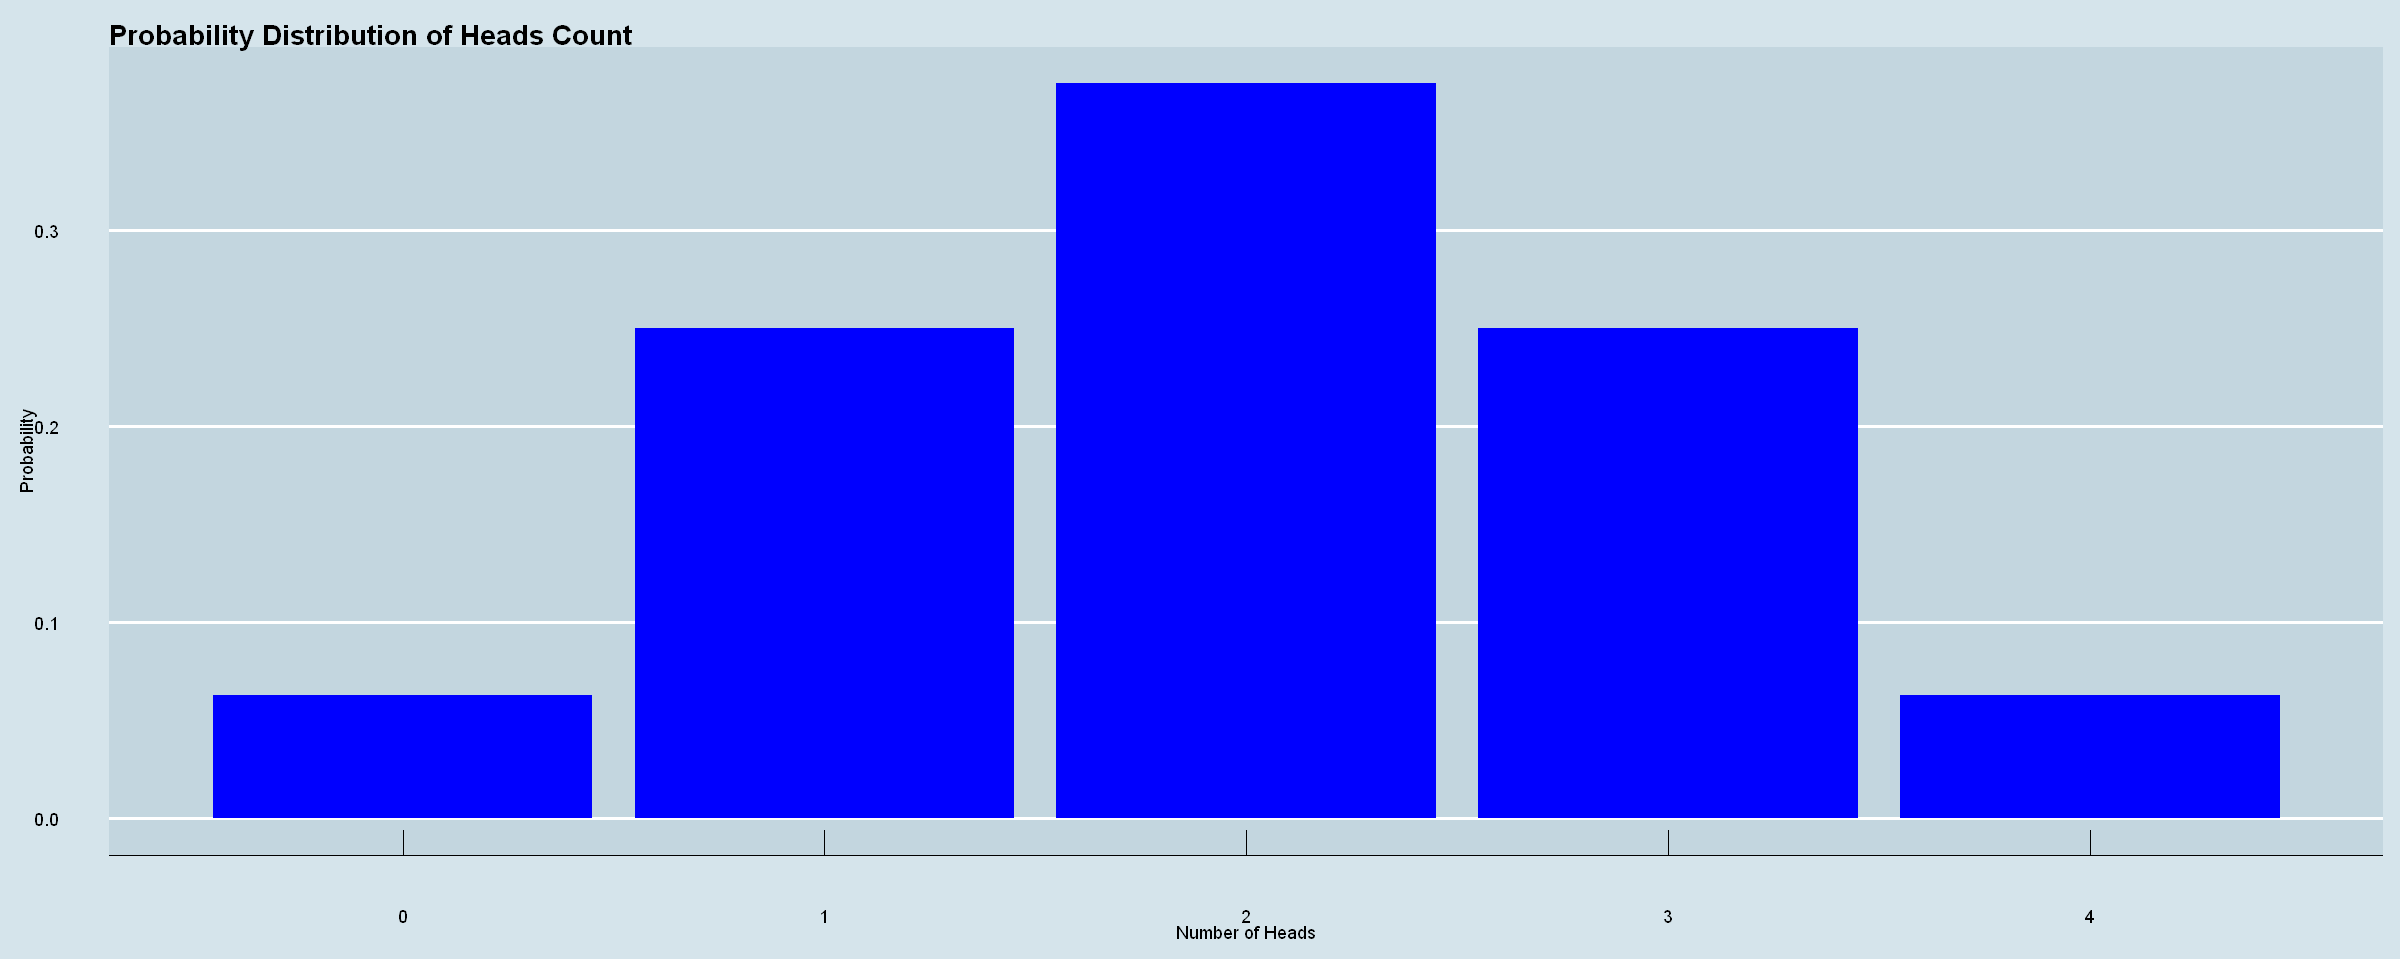

In [4]:
#######################################################################################
## PLOTTING PROBABILITY MEAN FUNCTION (PMF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################

# Now plot using ggplot2 and ggtheme (ggtheme is libarary for some nice theme - here we use the economist theme).
library(ggplot2)
library(ggthemes)

options(repr.plot.width=20, repr.plot.height=8) # this is just to make the plots wider (extend to the end of laptop display) 

ggplot(data = probability_summary, aes(x = Heads_Count, y = Probability)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Number of Heads", y = "Probability", title = "Probability Distribution of Heads Count") +
  theme_economist(base_size = 30, dkpanel=TRUE)

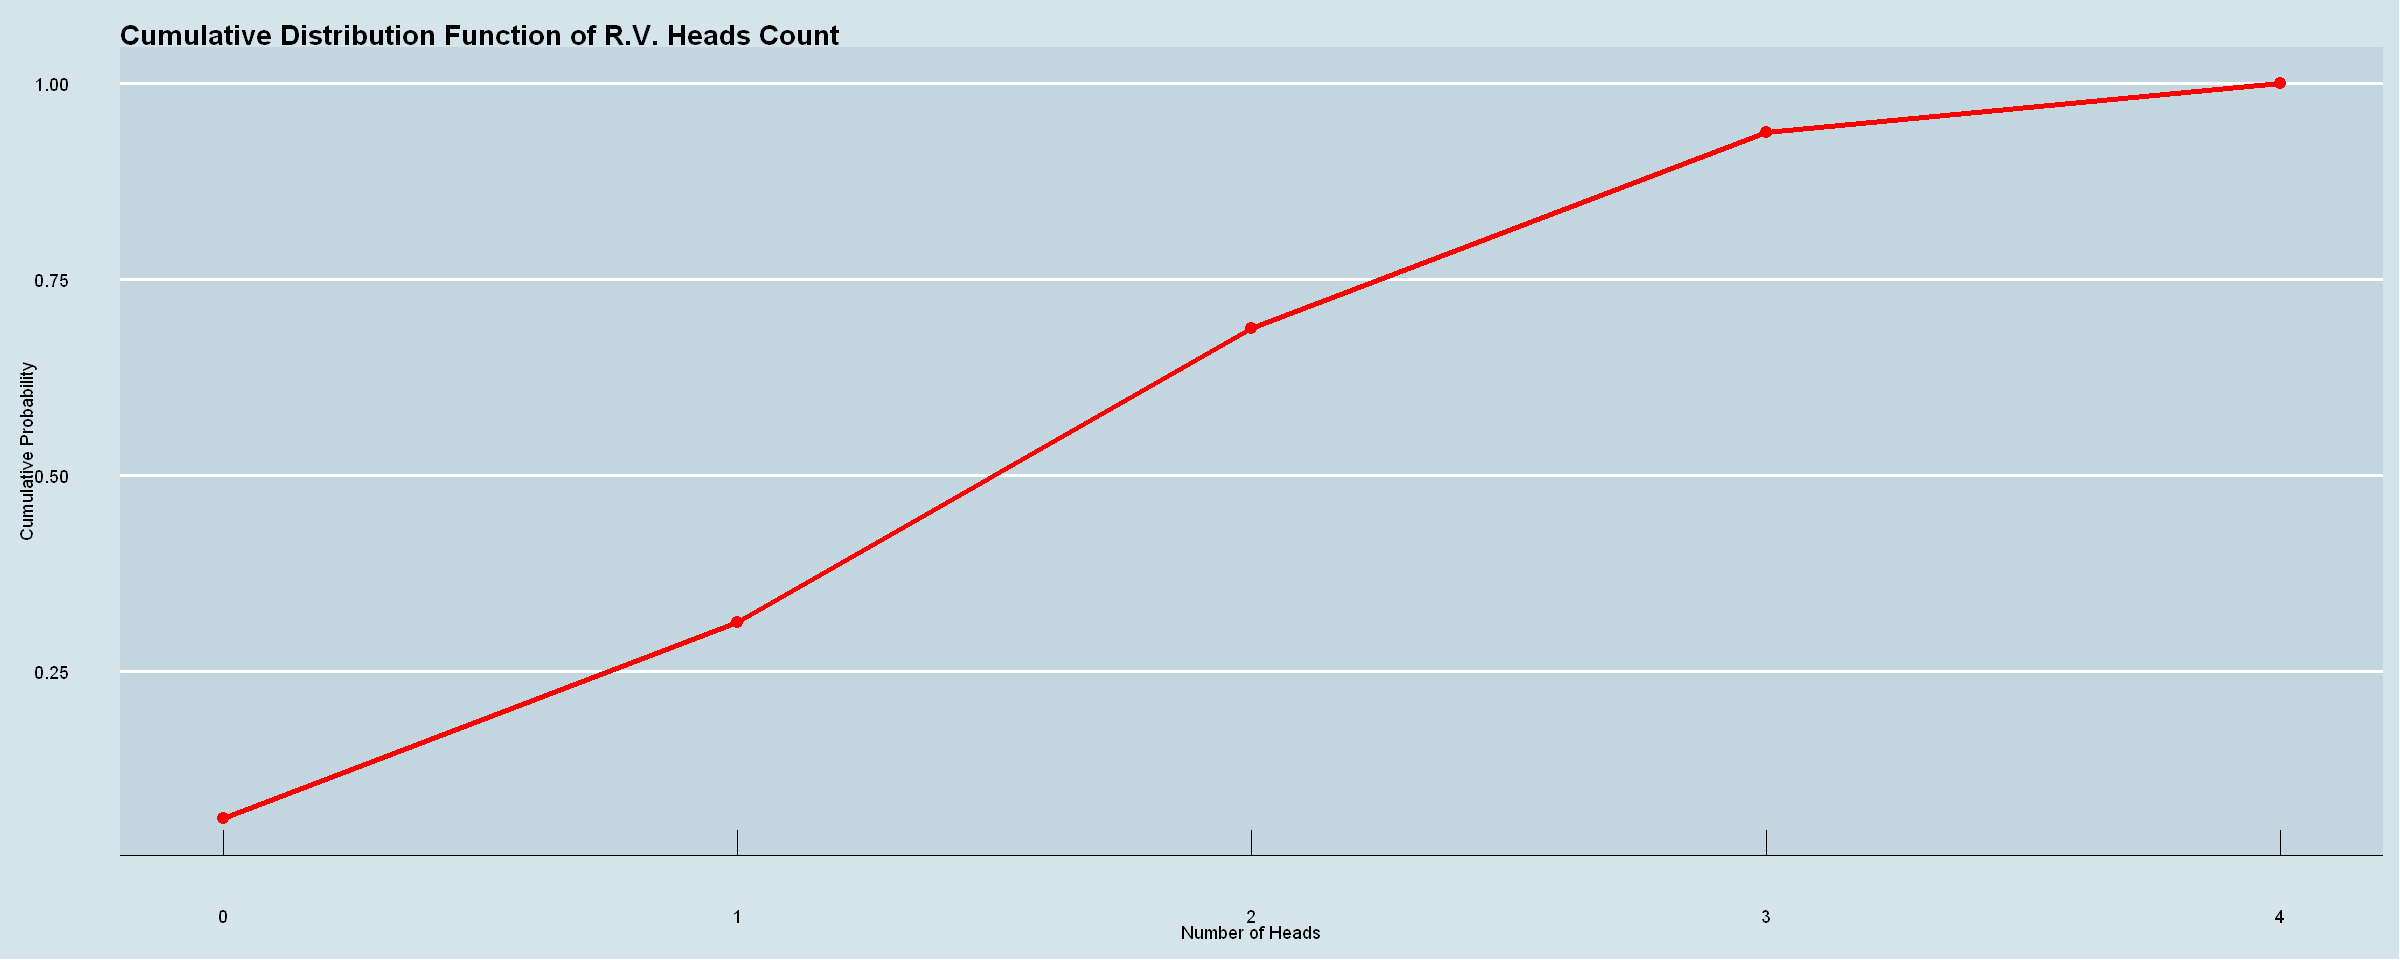

In [5]:
#######################################################################################
## PLOTTING CUMMULATIVE DISTRIBUTION FUNCTION (CDF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################

# Create the line graph for cumulative probabilities
ggplot(data = probability_summary, aes(x = Heads_Count)) +
  geom_line(aes(y = Cumulative_P, group = 1), color = "red", linewidth = 1.5) +  # Updated to use 'linewidth'
  geom_point(aes(y = Cumulative_P), color = "red", size = 3) +
  labs(x = "Number of Heads", y = "Cumulative Probability") +
  ggtitle("Cumulative Distribution Function of R.V. Heads Count") +
  theme_economist(base_size = 30, dkpanel=TRUE)

* SIMULATION 2: We can make a more dynamic simulation where we can set more trials and more coin flips

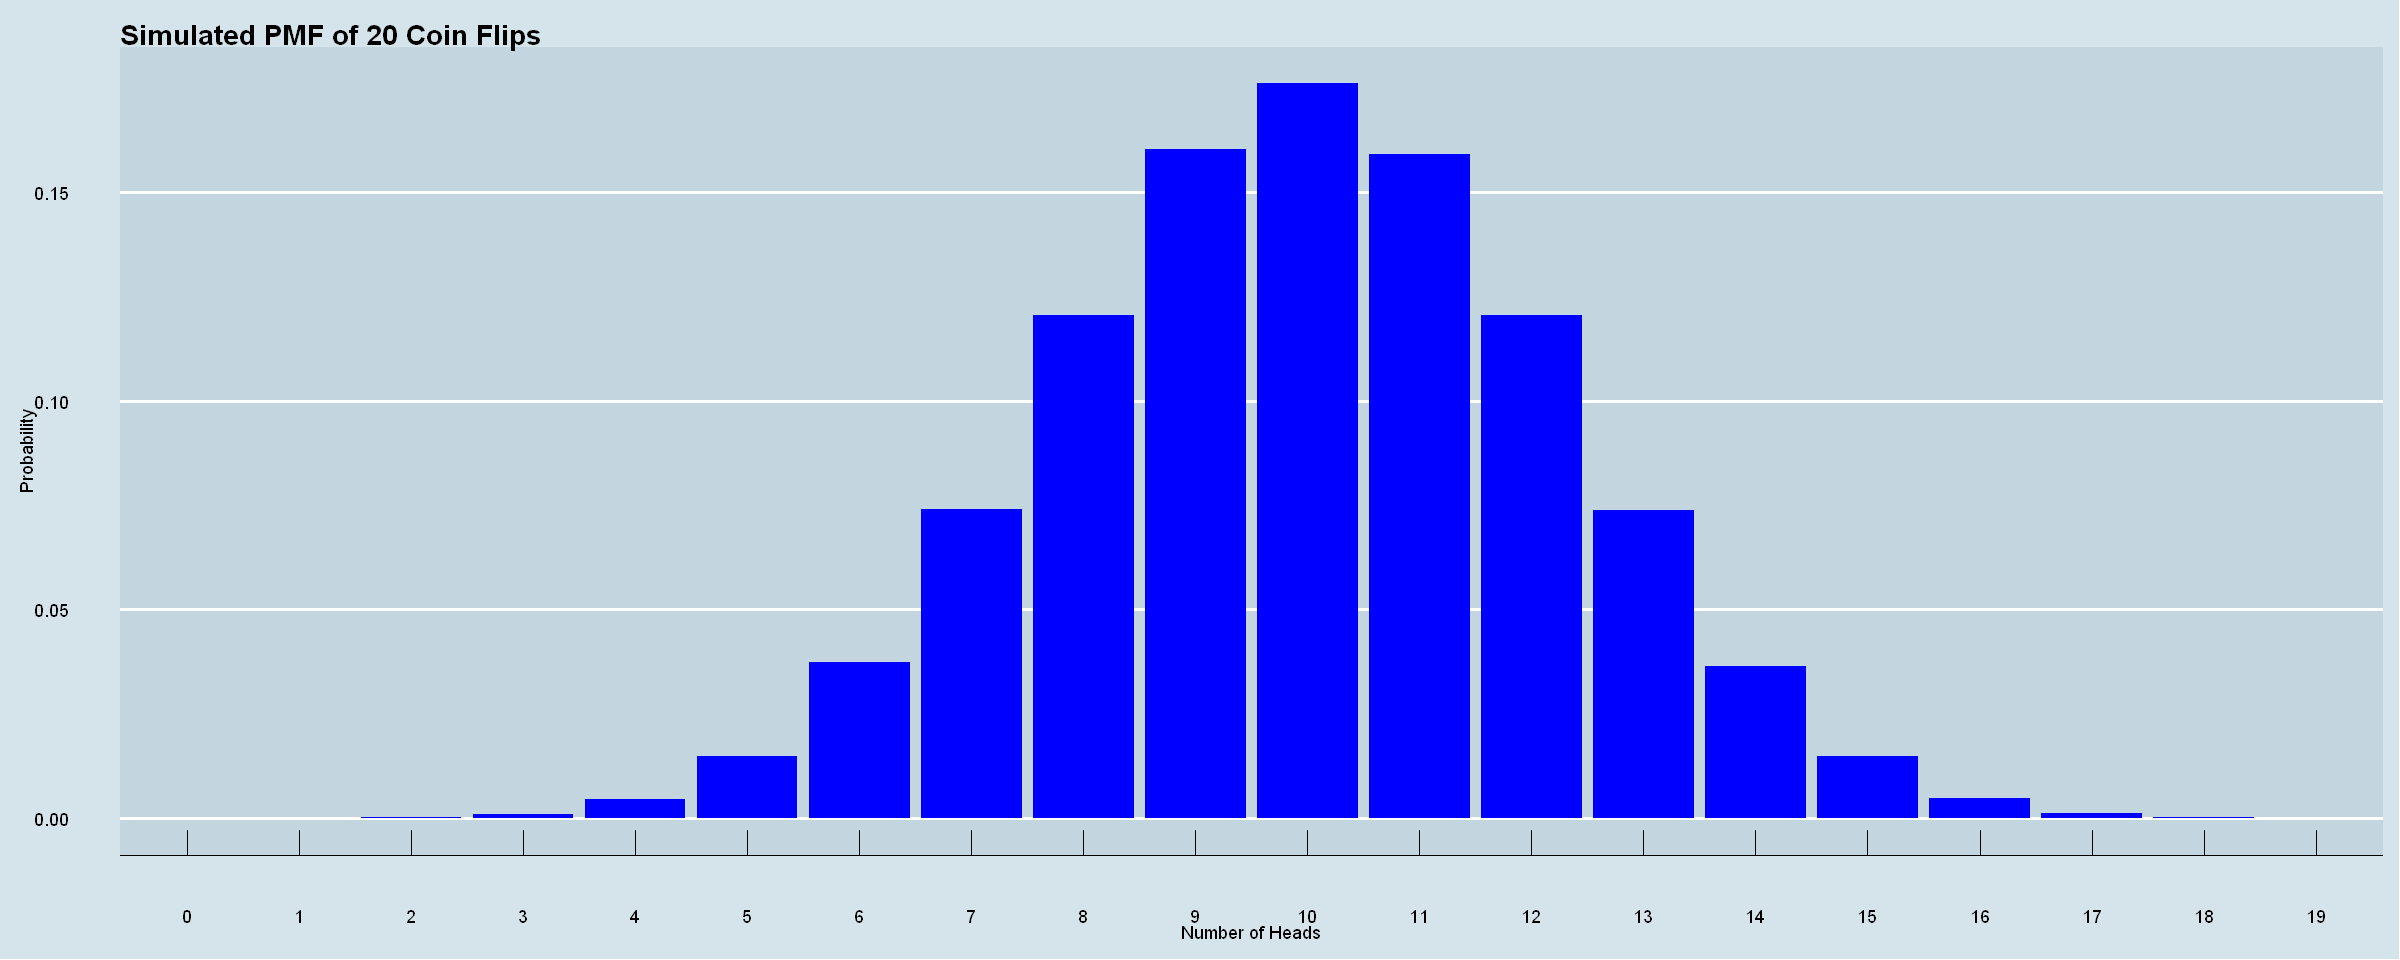

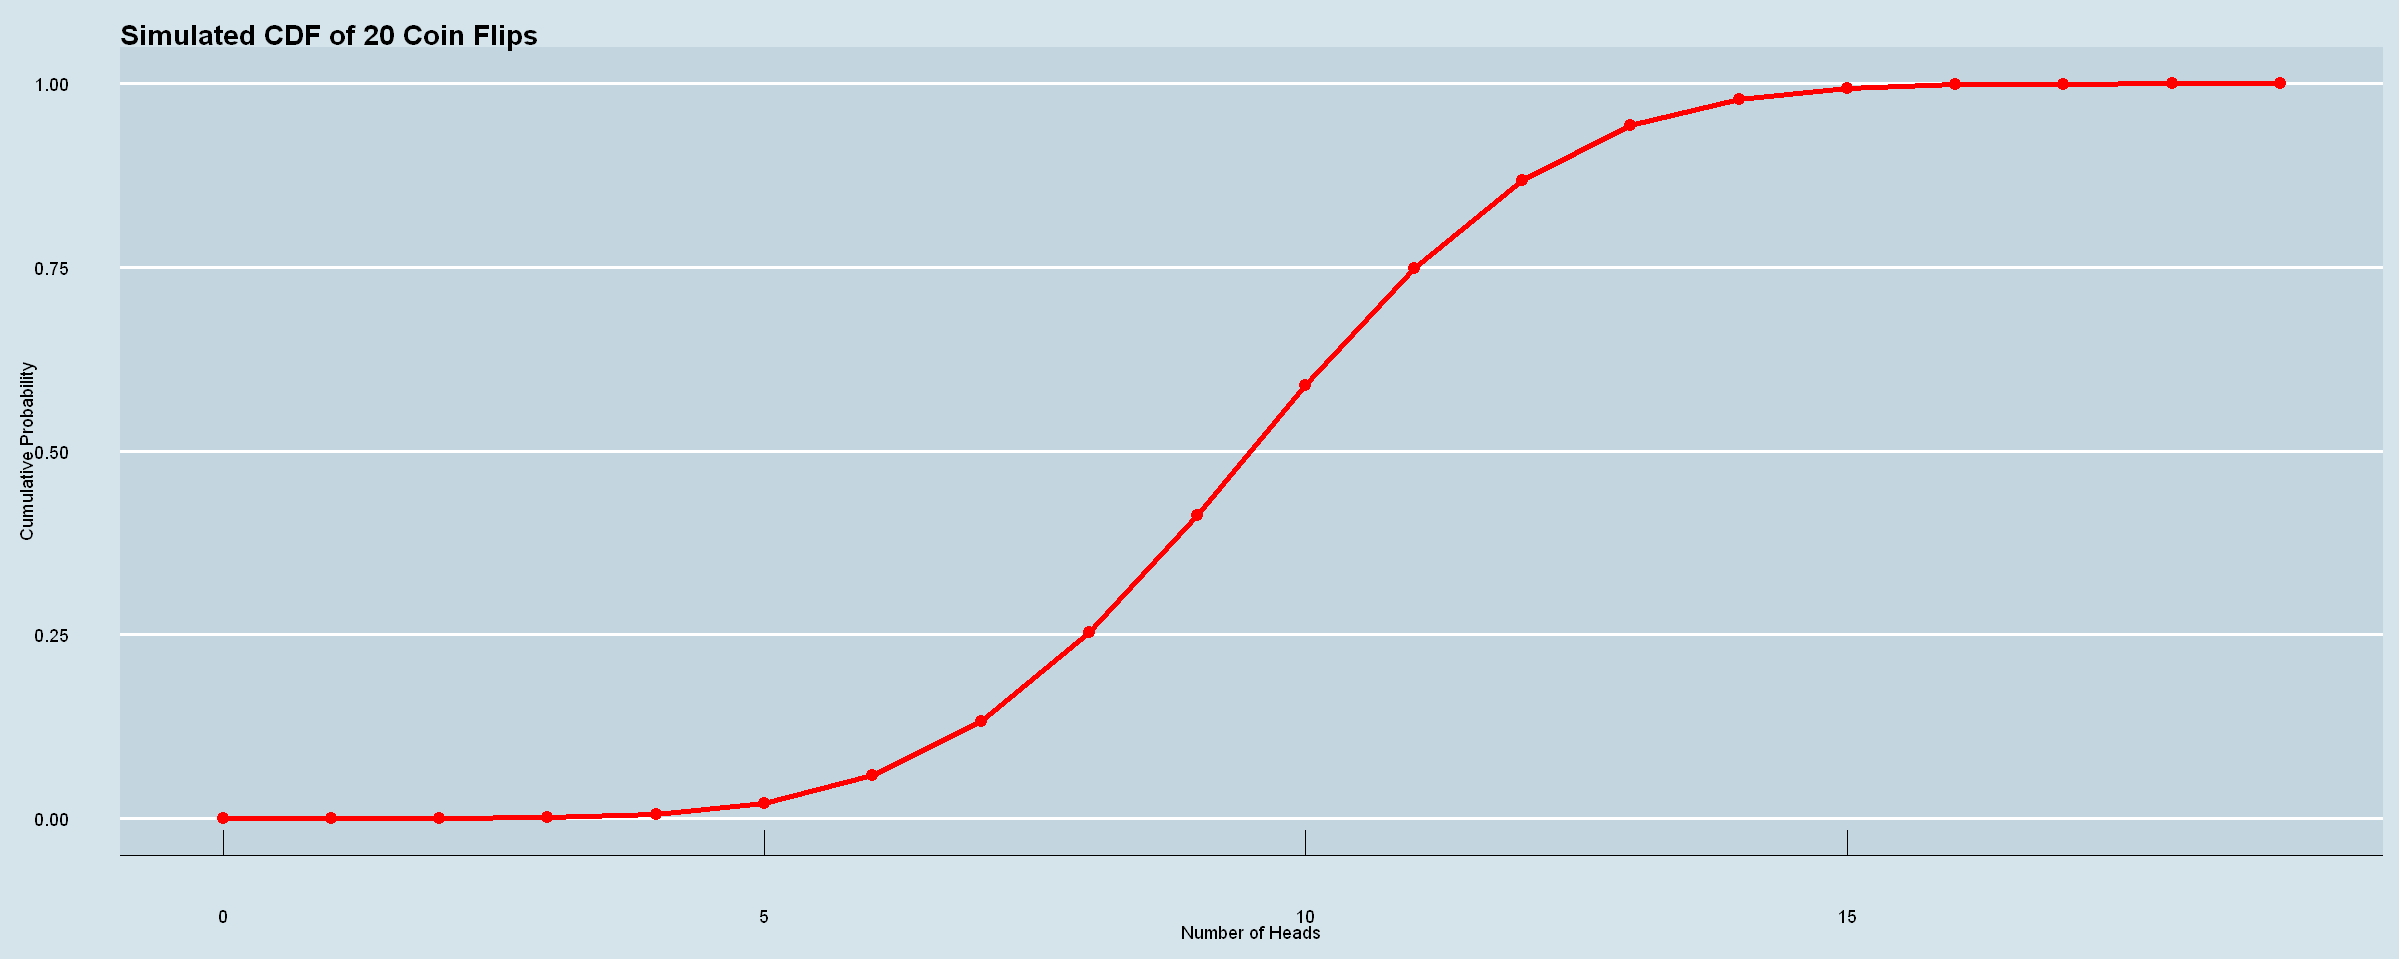

In [6]:
#######################################################################################
## PLOTTING CUMMULATIVE DISTRIBUTION FUNCTION (CDF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################
library(ggplot2)
library(ggthemes)
n_flips <- 20  # Set the number of coin flips

# Number of simulations
n_simulations <- 500000  # Set the number of trials/simulation

# Run simulations: each row is one trial, each column is a coin flip
simulated_flips <- matrix(sample(c(0,1), size = n_simulations * n_flips, replace = TRUE), 
                          nrow = n_simulations, ncol = n_flips)

# Count number of heads in each trial
heads_count <- rowSums(simulated_flips)

# Estimate PMF by counting occurrences
pmf_data <- as.data.frame(table(heads_count))
colnames(pmf_data) <- c("Heads_Count", "Probability")

# Convert to numeric and normalize probabilities
pmf_data$Heads_Count <- as.numeric(as.character(pmf_data$Heads_Count))
pmf_data$Probability <- pmf_data$Probability / n_simulations  # Convert count to probability
pmf_data$Cumulative_P <- cumsum(pmf_data$Probability)  # Compute cumulative probabilities

# PMF Plot
pmf_plot <- ggplot(pmf_data, aes(x = as.factor(Heads_Count), y = Probability)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Number of Heads", y = "Probability", title = paste("Simulated PMF of", n_flips, "Coin Flips")) +
  theme_economist(base_size = 30, dkpanel=TRUE)  

pmf_plot

# CDF Plot (Line Graph)
cdf_plot <- ggplot(pmf_data, aes(x = Heads_Count, y = Cumulative_P)) +
  geom_line(color = "red", linewidth = 1.5) +
  geom_point(color = "red", size = 3) +
  labs(x = "Number of Heads", y = "Cumulative Probability", title = paste("Simulated CDF of", n_flips, "Coin Flips")) +
  theme_economist(base_size = 30, dkpanel=TRUE) 

cdf_plot

## **B. Continous Random Variable**<a class="anchor" id="b"></a>
<hr>

### **B. 1 Probability Distribution Function**<a class="anchor" id="b.1"></a>
Let $X$ be a random variable. $X$ is continuous if there exists a function $f_X$ such that:

$$
f_X(x) \geq 0 \text{ for all } x, \quad \text{and} \quad \int_{-\infty}^{\infty} f_X(x) \, dx = 1
$$

For $a \leq b$:

$$
P(a \leq X \leq b) = \int_a^b f_X(x) \, dx
$$

The function $f_X$ is called the Probability Density Function (PDF).

**Example :**

Let $X$ be a continuous r.v. with PDF $f(x) = kx^2$ where $0 \leq x \leq 1$. First, find $k$ to ensure $f(x)$ is a valid PDF:

$$
\int_0^1 kx^2 \, dx = 1
$$

To solve for $k$:

$$
\int_0^1 kx^2 \, dx = \frac{k}{3}[x^3]_0^1 = \frac{k}{3} = 1
$$

$$
k = 3
$$


### **B. 2 Cumulative Distribution Function**<a class="anchor" id="b.2"></a>
For a continuous random variable, the CDF can be expressed as:

$$
F_X(x) = P(X \leq x) = \int_{-\infty}^x f(t) \, dt
$$

## **C. Expectation and Variance of Random Variable**<a class="anchor" id="c"></a>
<hr>

### **C.1  Expectation of Random Variable**
Let $X$ be a random variable. If $X$ is a continuous random variable with probability density function (pdf) $f(x)$, then the expectation of $X$ is:

$$
E(X) = \int_{-\infty}^{\infty} x f(x) \, dx
$$

If $X$ is a discrete random variable with probability mass function (pmf) $p(x)$, then the expectation of $X$ is:

$$
E(X) = \sum x p(x)
$$

Let $g(X)$ be a function on $X$, that is $Y = g(X)$, then the expected value of $g(X)$ is:

$$
E(g(X)) = \sum g(x) p(x) \quad \text{if $X$ is discrete}
$$

$$
E(g(X)) = \int_{-\infty}^{\infty} g(x) f(x) \, dx \quad \text{if $X$ is continuous}
$$

**Example :**
<hr>

Let $X$ be a discrete random variable with the following probability function:

$$
\begin{array}{c|cccccc}
x & -1 & 0 & 1 & 2 & 3 & 4 & 5 \\
\hline
P(X=x) & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7}
\end{array}
$$

To find the expected value $E[X]$, we calculate:

$$
\mu = E[X] = \sum x P(x) = \left(-1 \cdot \frac{1}{7}\right) + \left(0 \cdot \frac{1}{7}\right) + \left(1 \cdot \frac{1}{7}\right) + \left(2 \cdot \frac{1}{7}\right) + \left(3 \cdot \frac{1}{7}\right) + \left(4 \cdot \frac{1}{7}\right) + \left(5 \cdot \frac{1}{7}\right)
$$

$$
\mu = \frac{-1 + 0 + 1 + 2 + 3 + 4 + 5}{7} = \frac{14}{7} = 2
$$

### **C.2  Variance of Random Variable**

Variance of a Random Variable is defined as the expected value of the squared deviation of $X$ from its mean:

$$
\sigma^2 = E[(X - \mu)^2]
$$

Expanding this, we get:

$$
\sigma^2 = E[X^2] - 2XE[\mu] + \mu^2 \quad \text{by linearity of expectation and $\mu$ constant (E[$\mu$] = $\mu$)}
$$

$$
\sigma^2 = E[X^2] - 2\mu E[X] + \mu^2
$$

$$
\sigma^2 = E[X^2] - 2\mu^2 + \mu^2
$$

$$
\sigma^2 = E[X^2] - \mu^2
$$

Thus, the variance is also given by:

$$
\sigma^2 = E[X^2] - (E[X])^2
$$

**Example:**

Suppose we have a PDF $f(x) = 3x^2$ on $0 \leq x \leq 1$. 
Find $E(X)$:

$$
E(X) = \int_0^1 x \cdot 3x^2 \, dx = 3\int_0^1 x^3 \, dx
$$

$$
E(X) = 3\left[\frac{x^4}{4}\right]_0^1 = 3\left[\frac{1}{4}\right] = \frac{3}{4}
$$

**Example**

Given a continuous random variable $X$ with probability density function (PDF) $f(x) = \frac{x^2}{3}$ within the interval $0 \leq x \leq 1$, we first find the expected value $E(X)$ and then calculate the variance $\sigma^2$.

#### **Expected Value $E(X)$**

The expected value is calculated as:

$$
E(X) = \int_0^1 x \cdot \frac{x^2}{3} \, dx = \frac{1}{3} \int_0^1 x^3 \, dx
$$

Evaluating the integral:

$$
E(X) = \frac{1}{3} \left[\frac{x^4}{4}\right]_0^1 = \frac{1}{3} \left[\frac{1}{4}\right] = \frac{1}{12}
$$

#### **Second Moment $E(X^2)$**

To find the second moment, $E(X^2)$, set $g(X) = X^2$:

$$
E(X^2) = \int_0^1 x^2 \cdot \frac{x^2}{3} \, dx = \frac{1}{3} \int_0^1 x^4 \, dx
$$

Evaluating the integral:

$$
E(X^2) = \frac{1}{3} \left[\frac{x^5}{5}\right]_0^1 = \frac{1}{3} \left[\frac{1}{5}\right] = \frac{1}{15}
$$

#### **Variance $\sigma^2$**

Variance of $X$ is given by:

$$
\sigma^2 = E(X^2) - [E(X)]^2
$$

Plugging in the values:

$$
\sigma^2 = \frac{1}{15} - \left(\frac{1}{12}\right)^2 = \frac{1}{15} - \frac{1}{144}
$$

Converting to a common denominator and simplifying:

$$
\sigma^2 = \frac{48}{720} - \frac{5}{720} = \frac{43}{720} \approx 0.0597
$$

Thus, the variance of the random variable $X$ is approximately $0.0597$.

### **C. 3 R Simulation of Expectation and Variance of Random Variable**

### **1st Example - Discrete Random Variable**

By using the example from A.3, we can count the $E(x)$ and $Var(x)$

In [7]:
probability_summary <- as.data.frame(probability_summary)
probability_summary$x_Px <- probability_summary$Heads_Count * probability_summary$Probability
probability_summary
total_sum_ex<-sum(probability_summary$x_Px, na.rm = TRUE)
cat("Expected Value of RV is", total_sum_ex,"\n")

Heads_Count,Probability,Cumulative_P,x_Px
<dbl>,<dbl>,<dbl>,<dbl>
0,0.0625,0.0625,0.00
1,0.2500,0.3125,0.25
2,0.3750,0.6875,0.75
3,0.2500,0.9375,0.75
4,0.0625,1.0000,0.25


Expected Value of RV is 2 


In [12]:
probability_summary <- as.data.frame(probability_summary)
probability_summary$x_Px  <- probability_summary$Heads_Count * probability_summary$Probability
probability_summary$x2_Px  <- (probability_summary$Heads_Count)^2 * probability_summary$Probability
probability_summary
total_sum_ex2<-sum(probability_summary$x2_Px, na.rm = TRUE)
cat("E(X) is", total_sum_ex,"\n")
cat("E(X^2) is", total_sum_ex2,"\n")
cat("Variance (sigma^2)=E(X^2)-(E(x))^2 is", total_sum_ex2-(total_sum_ex)^2,"\n")

Heads_Count,Probability,Cumulative_P,x_Px,x2_Px
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.0625,0.0625,0.00,0.00
1,0.2500,0.3125,0.25,0.25
2,0.3750,0.6875,0.75,1.50
3,0.2500,0.9375,0.75,2.25
4,0.0625,1.0000,0.25,1.00


E(X) is 2 
E(X^2) is 5 
Variance (sigma^2)=E(X^2)-(E(x))^2 is 1 


**2nd Example - Continous Random Variable**

Suppose we have a PDF $f(x) = \lambda x^{-\lambda x}$ where $\lambda = \frac{1}{3}$and we need to  count the expectation of it and its variance in R. Here is the code.

In [9]:
#############################################################################################################################
## CALCULATING EXPECTATION AND VARIANCE OF A PDF $f(x) = \lambda x^{-\lambda x}$ where $\lambda = \frac{1}{3}$
#############################################################################################################################
# Define the lambda parameter
lambda <- 1/3

# PDF function for the exponential distribution
pdf_function <- function(x) {
  lambda * exp(-lambda * x)
}

# Expected value calculation
expected_value <- function(lambda) {
  integrate(function(x) x * pdf_function(x), lower = 0, upper = Inf)$value
}

# Second moment (E[X^2]) calculation
second_moment <- function(lambda) {
  integrate(function(x) x^2 * pdf_function(x), lower = 0, upper = Inf)$value
}

# Calculate expected value
E_X <- expected_value(lambda)

# Calculate second moment
E_X2 <- second_moment(lambda)

# Calculate variance
variance <- E_X2 - E_X^2

# Output results
cat("Expected Value E[X]:", E_X, "\n")
cat("Variance Var(X):", variance, "\n")


Expected Value E[X]: 3 
Variance Var(X): 9 


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


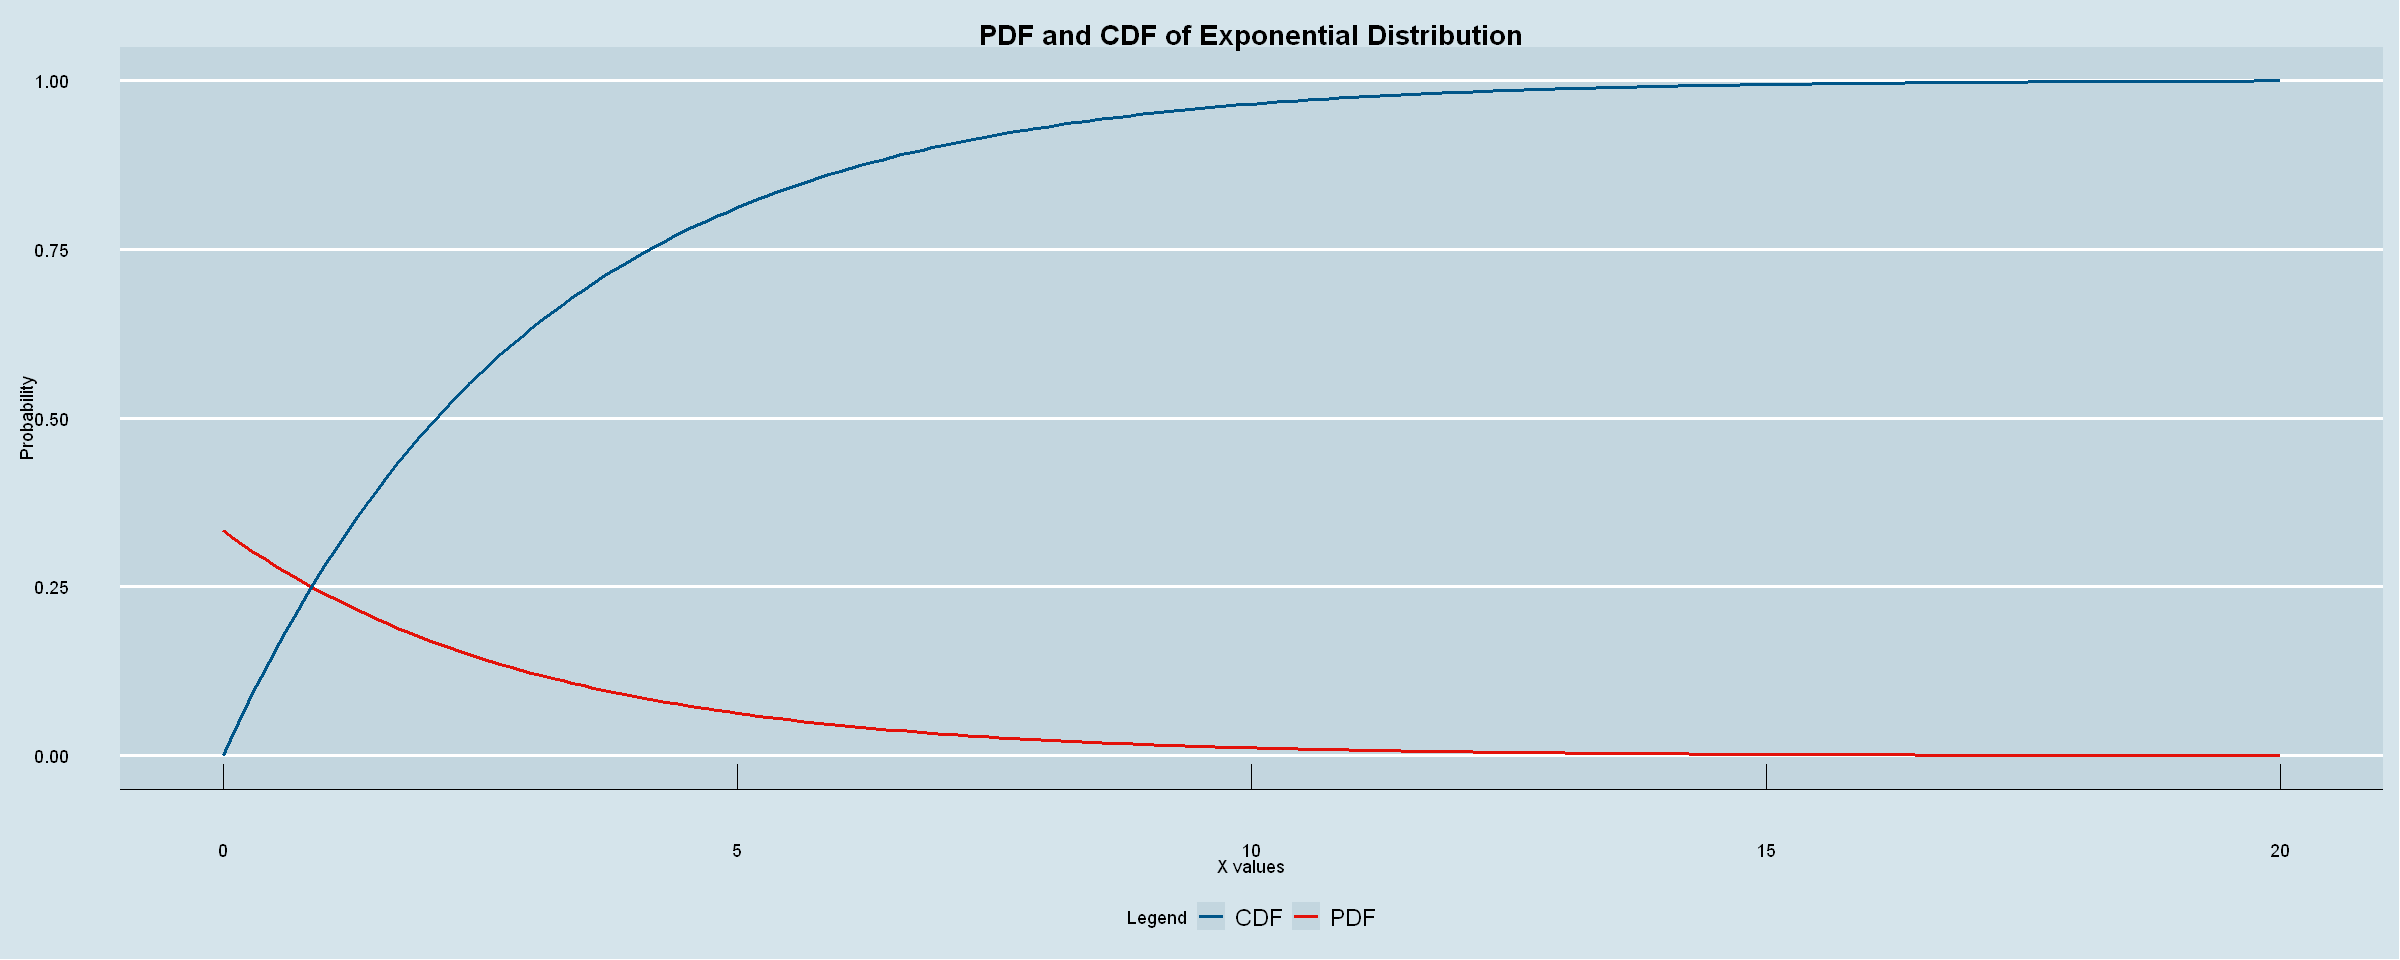

In [10]:
#############################################################################################################################
## PLOTTING PDF and CDF OF A CONTINOUS RANDOM VARIABLE $f(x) = \lambda x^{-\lambda x}$ where $\lambda = \frac{1}{3}$
#############################################################################################################################

# Define the lambda parameter
lambda <- 1/3

# Define the PDF function for the exponential distribution
pdf_function <- function(x) {
  lambda * exp(-lambda * x)
}

# Define a function to calculate the CDF by integrating the PDF
cdf_function <- function(x) {
  sapply(x, function(x_val) {
    integrate(pdf_function, lower = 0, upper = x_val)$value
  })
}

# Create a sequence of x values
x_values <- seq(0, 20, by = 0.1)

# Calculate PDF values
pdf_values <- pdf_function(x_values)

# Calculate CDF values
cdf_values <- cdf_function(x_values)

# Create a data frame for ggplot
data <- data.frame(x_values, pdf_values, cdf_values)

# Plotting PDF and CDF using ggplot2
ggplot(data, aes(x = x_values)) +
  geom_line(aes(y = pdf_values, color = "PDF"), size = 1) +
  geom_line(aes(y = cdf_values, color = "CDF"), size = 1) +
  scale_color_manual(values = c("PDF" = "#E3120B", "CDF" = "#005689")) +
  labs(title = "PDF and CDF of Exponential Distribution",
       x = "X values",
       y = "Probability",
       color = "Legend") +
  theme_economist(base_size = 30, dkpanel=TRUE) +
  theme(plot.title = element_text(hjust = 0.5),
        legend.position = "bottom",
        legend.title=element_text(hjust= 0.5))


## **D. Moment and Moment Generating Function** <a class="anchor" id="d"></a>
<hr>

### **D.1 Moment**
## Moments of a Distribution

Moments are quantitative measures related to the shape of the distribution function of a random variable.

### Definitions

- The **k-th moment about the origin** (raw moment) of a random variable $X$ is denoted by $\mu_k'$ and defined as:
  
  $$
  E[X^k]
  $$

- The **k-th moment about its mean** (central k-th moment) of a random variable $X$ is denoted by $\mu_k$ and defined as:
  
  $$
  E[(X-\mu)^k]
  $$

  where $\mu$ is the mean of $X$ and $k$ is typically 2, 3, 4, etc.

### **D.2 Moment Generating Function**
The moment generating function (MGF) of a random variable $X$ is a function $M_X(s)$ defined as
$$M_X(s) = \mathbb{E}[e^{sX}].$$
We say that MGF of $X$ exists, if there exists a positive constant $a$ such that $M_X(s)$ is finite for all $s \in [-a, a]$.


In [11]:
#################################################################### END #########################################################################################################